In [282]:
import pandas as pd
import os
import urllib
from zipfile import ZipFile 
import geopandas
import matplotlib.pyplot as plt
import shapely
from fiona.crs import from_epsg
%matplotlib inline

### 1. Got the Manhattan area which contains Time-Square 

In [6]:
#another way to get Manhattan map data
#with detailed information:
#https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_18v1.zip

#From NYU website:
#!curl -k https://archive.nyu.edu/retrieve/74708/nyu_2451_34509.zip > NYCzip.zip
#Filter Manhattan out of NYC:
#Man = NYC[(NYC.zipcode >10000)&(NYC.zipcode <10300)&(NYC.zipcode!=10026)&(NYC.zipcode!=10027)&(NYC.zipcode!=10029)&(NYC.zipcode!=10030)(NYC.zipcode!=10037)&(NYC.zipcode!=10038)]

In [296]:
#Got data from Public Use Microdata Area(PUMA)
urllib.request.urlretrieve('https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile', "file.gz")
!mv file.gz $PUIDATA
zipgz = ZipFile(os.getenv('PUIDATA') + '/' + 'file.gz')
zipgz.extractall(os.getenv('PUIDATA'))


NYC = geopandas.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/' + 'geo_export_947ddeb1-5148-4a2a-8619-c999a49409be.shp')
NYC.head()

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...


Text(0.5,1,'Manhattan Time-Square area')

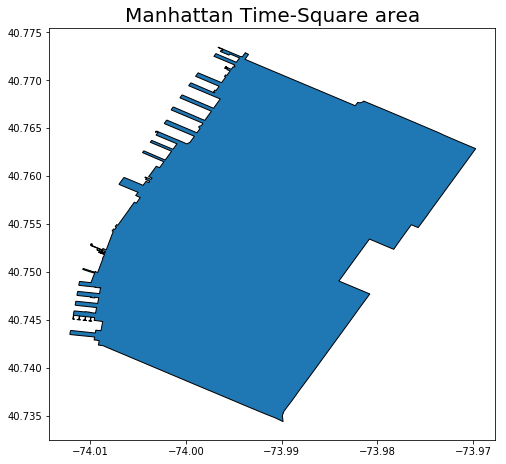

In [325]:
NYC['puma'] = NYC['puma'].astype(int)
NYC = NYC[(NYC['puma'] == 3807)]
NYC.plot(edgecolor='black', figsize=(8, 8))
plt.title('Manhattan Time-Square area', fontsize=20)

Figure 1: The contour of Manhattan area which contains Time-Square

In [287]:
NYC.crs

{'init': 'epsg:4326'}

### 2. Got the Food data in Time-square

In [8]:
!curl https://data.cityofnewyork.us/api/views/kh2m-kcyz/rows.csv?accessType=DOWNLOAD > Food.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 82845    0 82845    0     0   294k      0 --:--:-- --:--:-- --:--:--  295k


In [9]:
!mv Food.csv $PUIDATA

In [137]:
FOOD = pd.read_csv(os.getenv('PUIDATA') + '/Food.csv')
FOOD.head()

,Company Name,Subindustry,Sub Subindustry,Address,Phone,Website,Borough,Postcode,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA,Location 1
0,Europa Cafe,Café / Deli,NaN,3 Times Sq,212-239-0160,www.euorpacafe.com,1,10036.0,40.756376,-73.986713,5.0,3.0,119.0,1024686.0,1.010140e+09,Midtown-Midtown South ...,"3 Times Sq\n(40.756376, -73.986713)"
1,Ranch 1,Quick Serve,Fast Food,832 Eighth Ave,2129561111,NaN,1,10019.0,40.762444,-73.985983,5.0,3.0,131.0,1024809.0,1.010220e+09,Midtown-Midtown South ...,"832 Eighth Ave\n(40.762444, -73.985983)"
2,Sosa Borella,Full Serve,Argentinian,832 Eighth Ave,(212) 262-8282,http://www.sosaborella.com/,1,10019.0,40.762444,-73.985983,5.0,3.0,131.0,1024809.0,1.010220e+09,Midtown-Midtown South ...,"832 Eighth Ave\n(40.762444, -73.985983)"
3,Mi Nidito (Cantina Mexicana),Full Serve,Mexican,852 Eighth Ave,(212) 265-0022,NaN,1,10019.0,40.763128,-73.985481,5.0,3.0,131.0,1081646.0,1.010230e+09,Midtown-Midtown South ...,"852 Eighth Ave\n(40.763128, -73.985481)"
4,Starbucks,Coffee,NaN,"871-879 Eighth Ave, Suite# 871",2122467699,www.starbucks.com,1,10019.0,40.763644,-73.985134,4.0,3.0,133.0,1025257.0,1.010438e+09,Clinton ...,"871-879 Eighth Ave, Suite# 871\n(40.763644, -7..."


In [310]:
FOOD_1 = FOOD[['Subindustry', 'Borough', 'Postcode', 'Latitude', 'Longitude']]
FOOD_1 = geopandas.GeoDataFrame(FOOD_1)
FOOD_1.dropna(inplace=True)
FOOD_1.head()

,Subindustry,Borough,Postcode,Latitude,Longitude
0,Café / Deli,1,10036.0,40.756376,-73.986713
1,Quick Serve,1,10019.0,40.762444,-73.985983
2,Full Serve,1,10019.0,40.762444,-73.985983
3,Full Serve,1,10019.0,40.763128,-73.985481
4,Coffee,1,10019.0,40.763644,-73.985134


In [311]:
FOOD_1 = FOOD_1[(FOOD_1['Postcode'] >10000)&
                  (FOOD_1['Postcode'] <10300)&
                  (FOOD_1['Postcode']!=10026)&
                  (FOOD_1['Postcode']!=10027)&
                  (FOOD_1['Postcode']!=10029)&
                  (FOOD_1['Postcode']!=10030)&
                  (FOOD_1['Postcode']!=10037)&
                  (FOOD_1['Postcode']!=10038)]

In [312]:
FOOD_1['Location'] = list(zip(FOOD_1.Longitude, FOOD_1.Latitude))
FOOD_1 = FOOD_1[(True - FOOD_1['Location'].isin([0]))]
FOOD_1['geometry'] = FOOD_1[['Location']].applymap(lambda x: shapely.geometry.Point(x))
FOOD_1.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '-' operator is not supported by numexpr for the bool dtype, use '^' instead
  unsupported[op_str]))


,Subindustry,Borough,Postcode,Latitude,Longitude,Location,geometry
0,Café / Deli,1,10036.0,40.756376,-73.986713,"(-73.986713, 40.756376)",POINT (-73.98671299999999 40.756376)
1,Quick Serve,1,10019.0,40.762444,-73.985983,"(-73.985983, 40.762444)",POINT (-73.98598299999999 40.762444)
2,Full Serve,1,10019.0,40.762444,-73.985983,"(-73.985983, 40.762444)",POINT (-73.98598299999999 40.762444)
3,Full Serve,1,10019.0,40.763128,-73.985481,"(-73.985481, 40.763128)",POINT (-73.98548100000001 40.763128)
4,Coffee,1,10019.0,40.763644,-73.985134,"(-73.985134, 40.763644)",POINT (-73.985134 40.763644)


In [314]:
#FOOD_1 = geopandas.GeoDataFrame(FOOD_1)
FOOD_1.crs

In [315]:
FOOD_1.crs

Text(0.5,1,'Times Square Food & Beverage Locations')

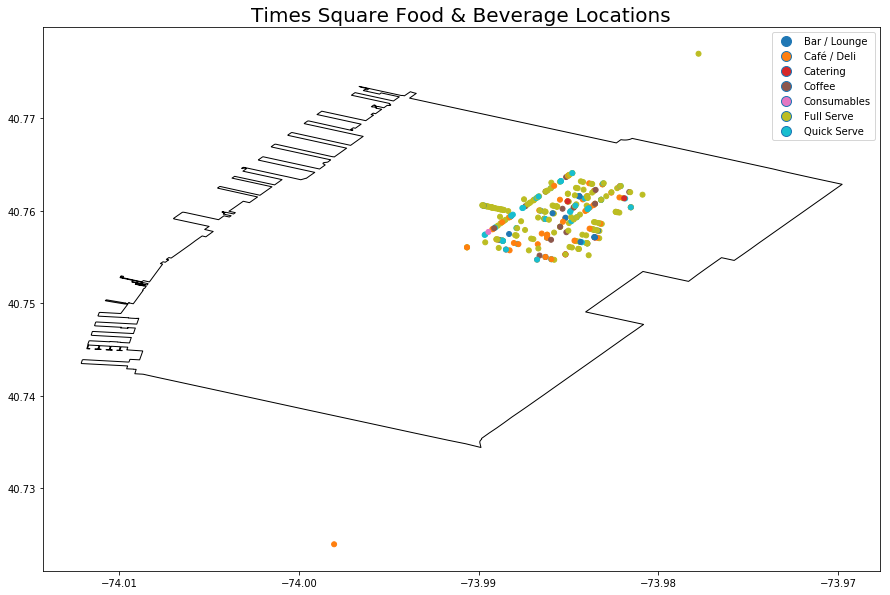

In [324]:
fig, ax = plt.subplots(figsize=(15,10))
NYC.plot(color='white', edgecolor='black', ax=ax)
FOOD_1.plot(column='Subindustry', marker='o', markersize=25, legend=True, ax=ax)
plt.title('Times Square Food & Beverage Locations',  fontsize=20)

**Figure 2:** 'Times Square Food & Beverage Locations' data is provided by Times Square Alliance (TSA), which indicates each specific shop with subindustry and location. This figure mainly plot their geolocation with subindustry. The number of shop which provided full service seems to be the largest amount, and the shop provided quick service tend to be at the edge of the square.